<a href="https://colab.research.google.com/github/Adhini99/Chest-X-Ray-Classification/blob/main/Copy_of_Chest_X_Ray_Vit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nirmalgaud_congenital_heart_disease_dataset_path = kagglehub.dataset_download('nirmalgaud/congenital-heart-disease-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/congenital-heart-disease-dataset/VSD/VSD208.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD182.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD55.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD111.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD132.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD133.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD114.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD145.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD170.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD127.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD64.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD158.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD27.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD94.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD100.jpg
/kaggle/input/congenital-heart-disease-dataset/VSD/VSD155.jpg
/kaggle/inpu

In [ ]:
import glob

base_dir = '/kaggle/input/congenital-heart-disease-dataset/'

class_dirs = [
    'ASD', 'Normal', 'PDA', 'VSD'
]

image_paths = []
labels = []

for class_name in class_dirs:
    class_path = os.path.join(base_dir, class_name)

    if os.path.exists(class_path):

        image_files = glob.glob(os.path.join(class_path, '*.jpg')) + \
                      glob.glob(os.path.join(class_path, '*.jpeg')) + \
                      glob.glob(os.path.join(class_path, '*.png'))

        for image_file in image_files:
            image_paths.append(image_file)
            labels.append(class_name)
    else:
        print(f"Warning: Directory not found: {class_path}")

df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

In [ ]:
df.head()

image_path label
0  /kaggle/input/congenital-heart-disease-dataset...   ASD
1  /kaggle/input/congenital-heart-disease-dataset...   ASD
2  /kaggle/input/congenital-heart-disease-dataset...   ASD
3  /kaggle/input/congenital-heart-disease-dataset...   ASD
4  /kaggle/input/congenital-heart-disease-dataset...   ASD

In [ ]:
df.tail()

image_path label
823  /kaggle/input/congenital-heart-disease-dataset...   VSD
824  /kaggle/input/congenital-heart-disease-dataset...   VSD
825  /kaggle/input/congenital-heart-disease-dataset...   VSD
826  /kaggle/input/congenital-heart-disease-dataset...   VSD
827  /kaggle/input/congenital-heart-disease-dataset...   VSD

In [ ]:
df.shape

(828, 2)

In [ ]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  828 non-null    object
 1   label       828 non-null    object
dtypes: object(2)
memory usage: 13.1+ KB


In [ ]:
df['label'].unique()

array(['ASD', 'Normal', 'PDA', 'VSD'], dtype=object)

In [ ]:
df['label'].value_counts()

label
PDA       216
VSD       210
Normal    208
ASD       194
Name: count, dtype: int64

/tmp/ipython-input-31-1449148172.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis", ax=ax)


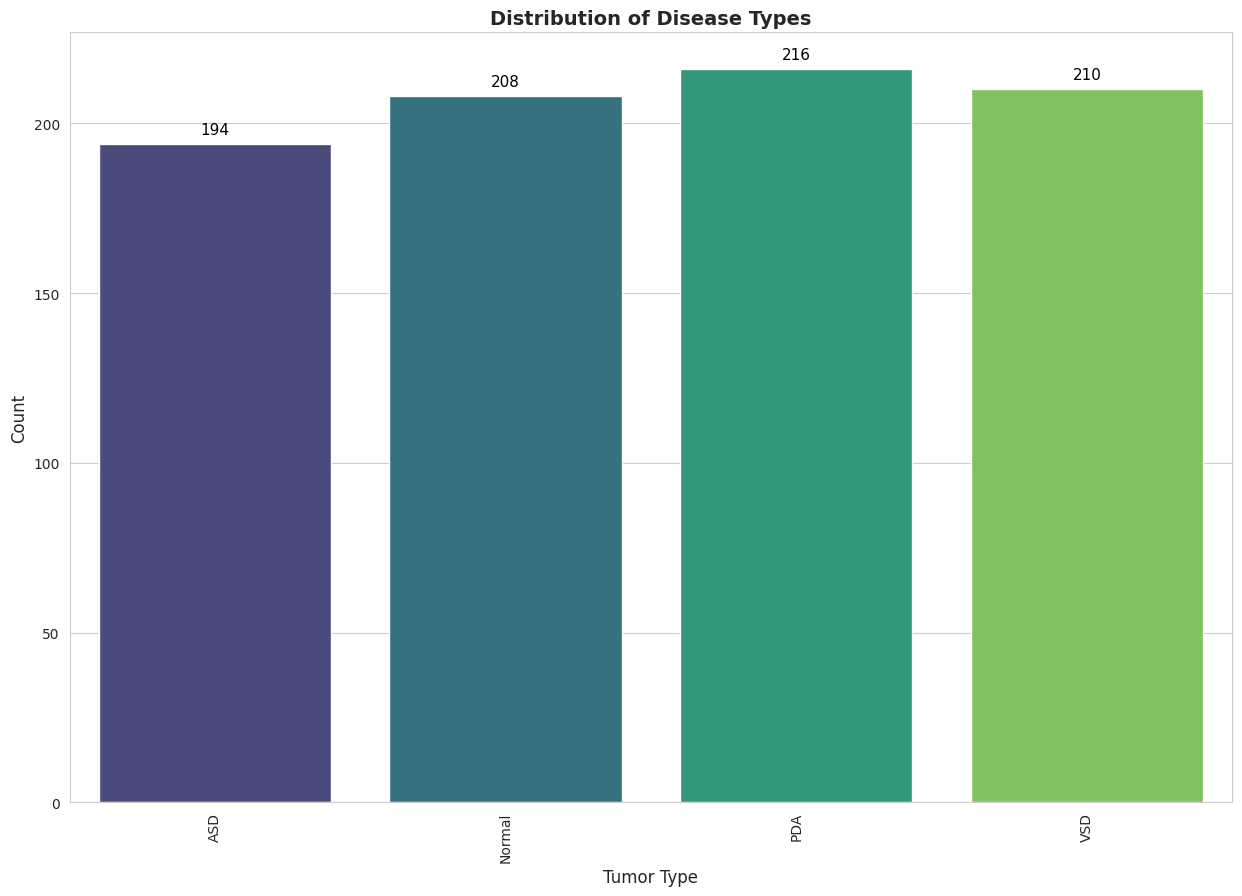

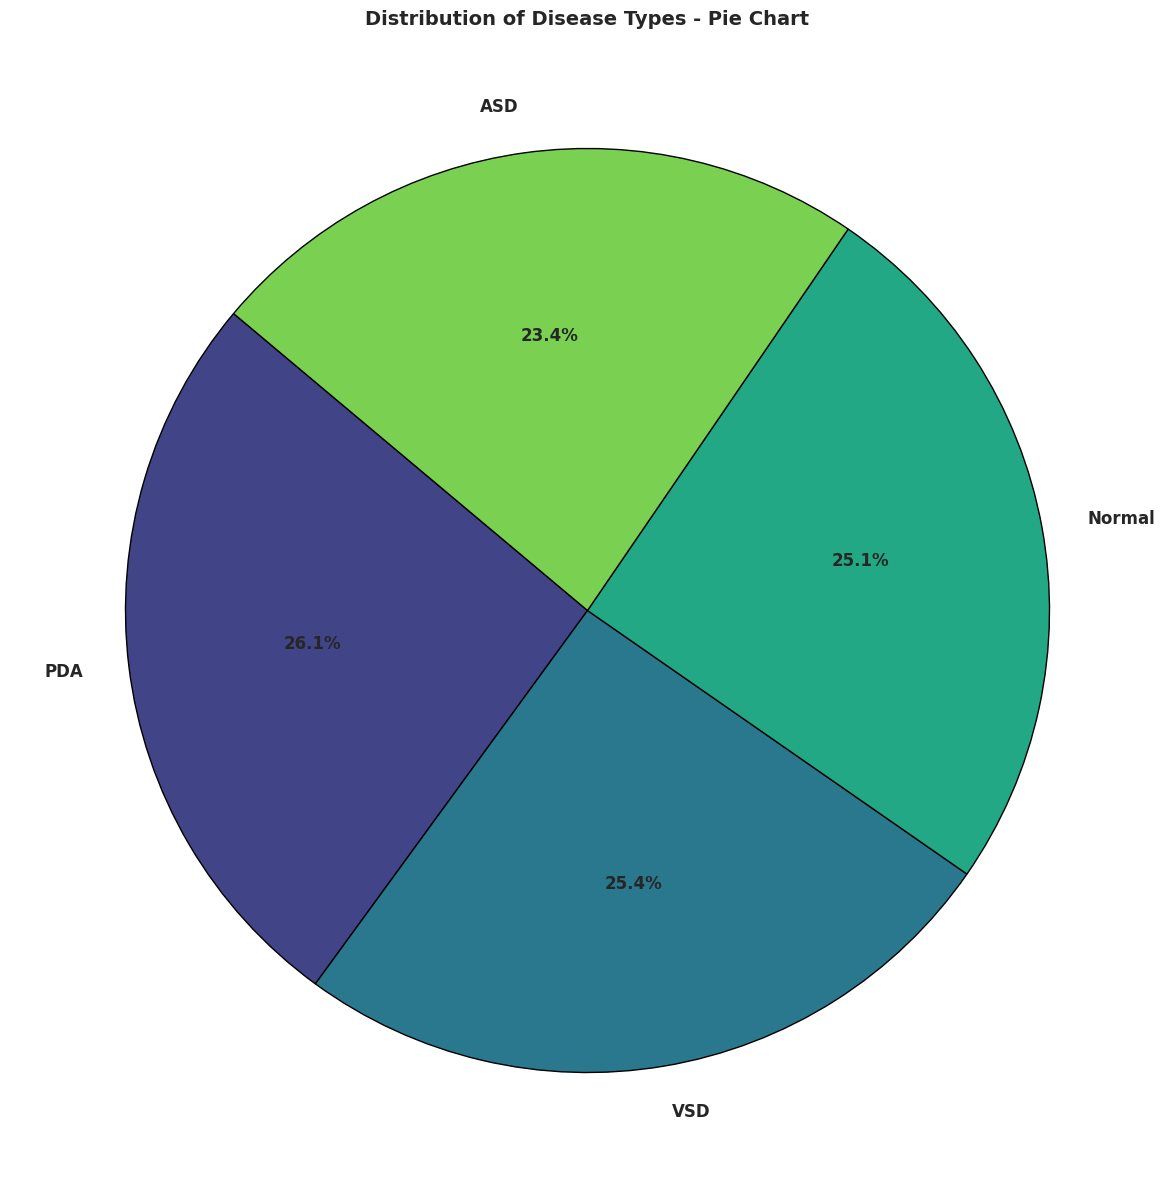

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)

ax.set_title("Distribution of Disease Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90)
plt.show()

label_counts = df["label"].value_counts()

fig, ax = plt.subplots(figsize=(35, 15))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Disease Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()

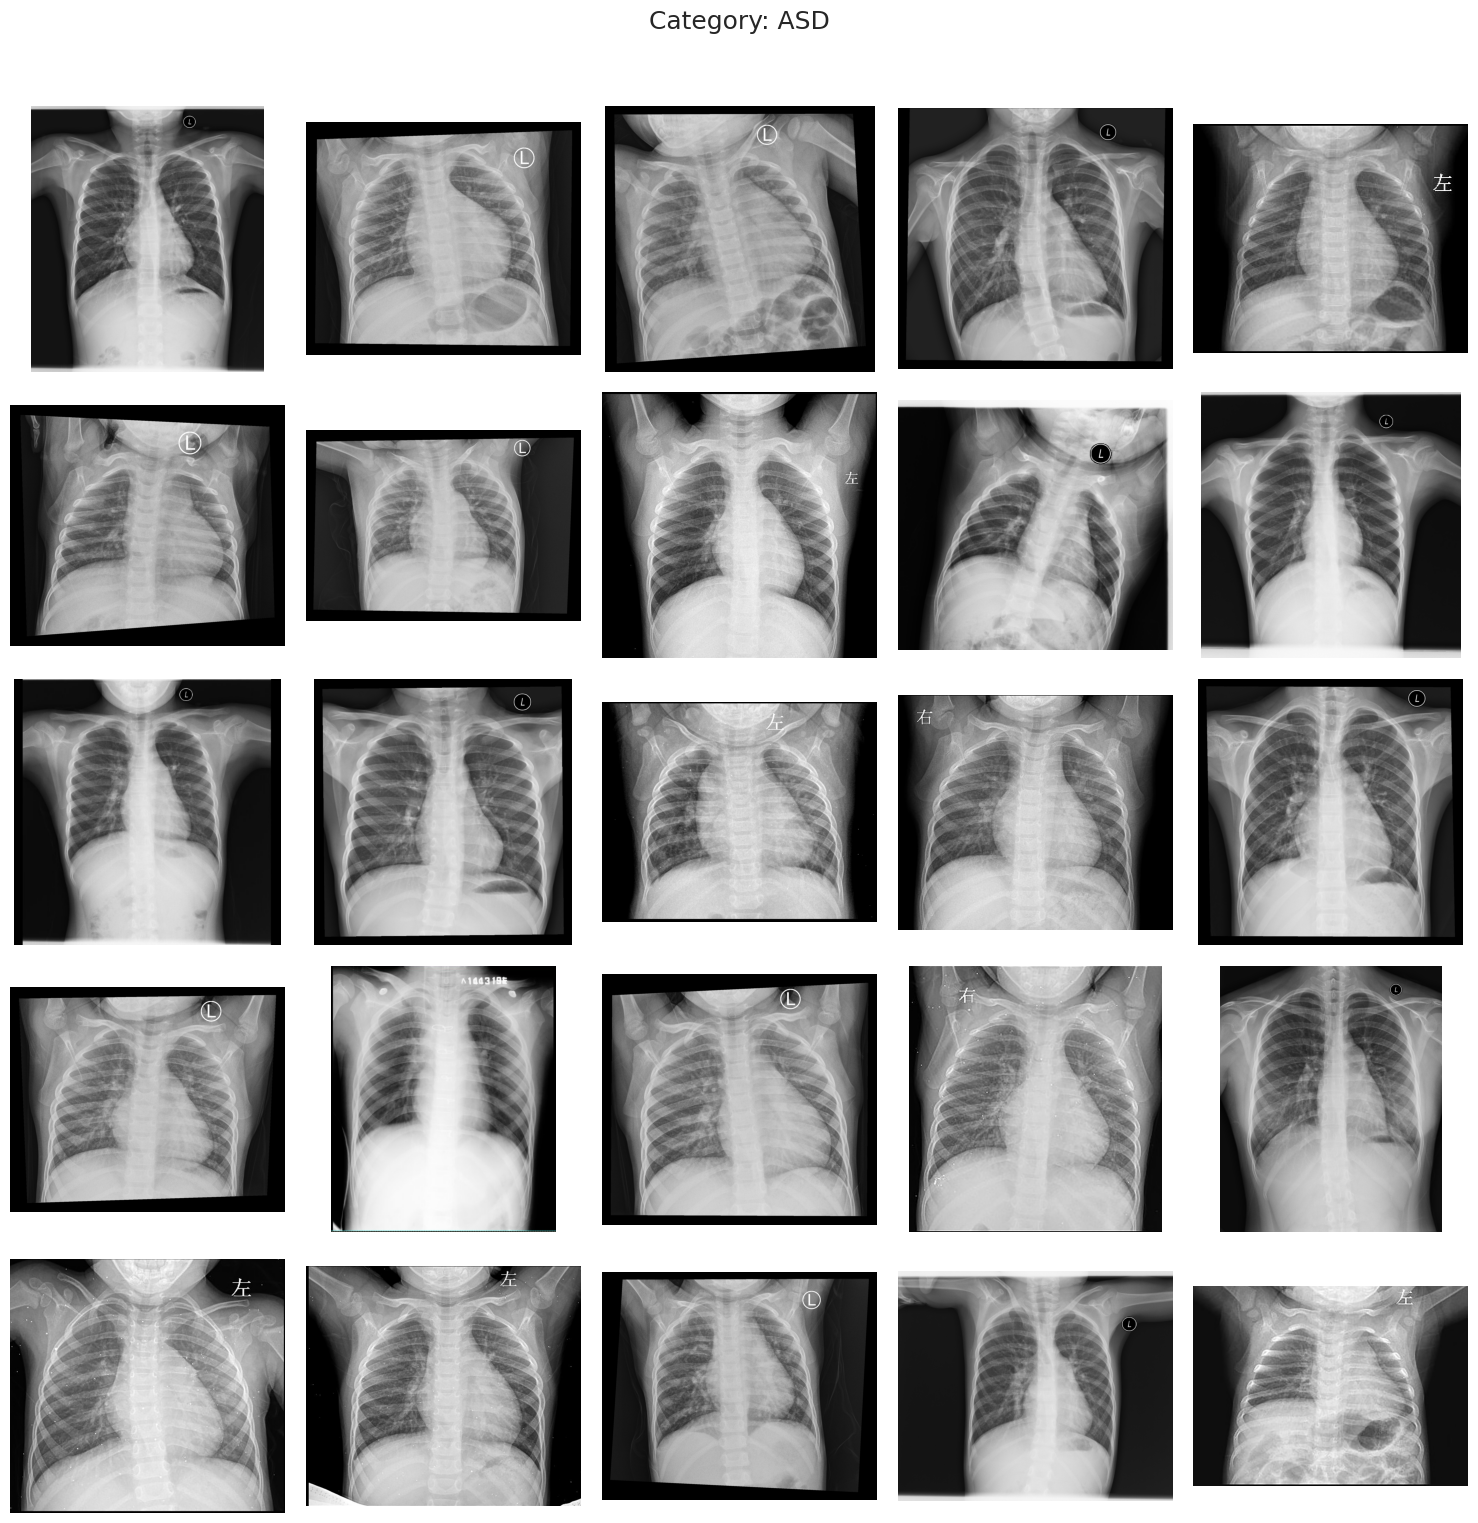

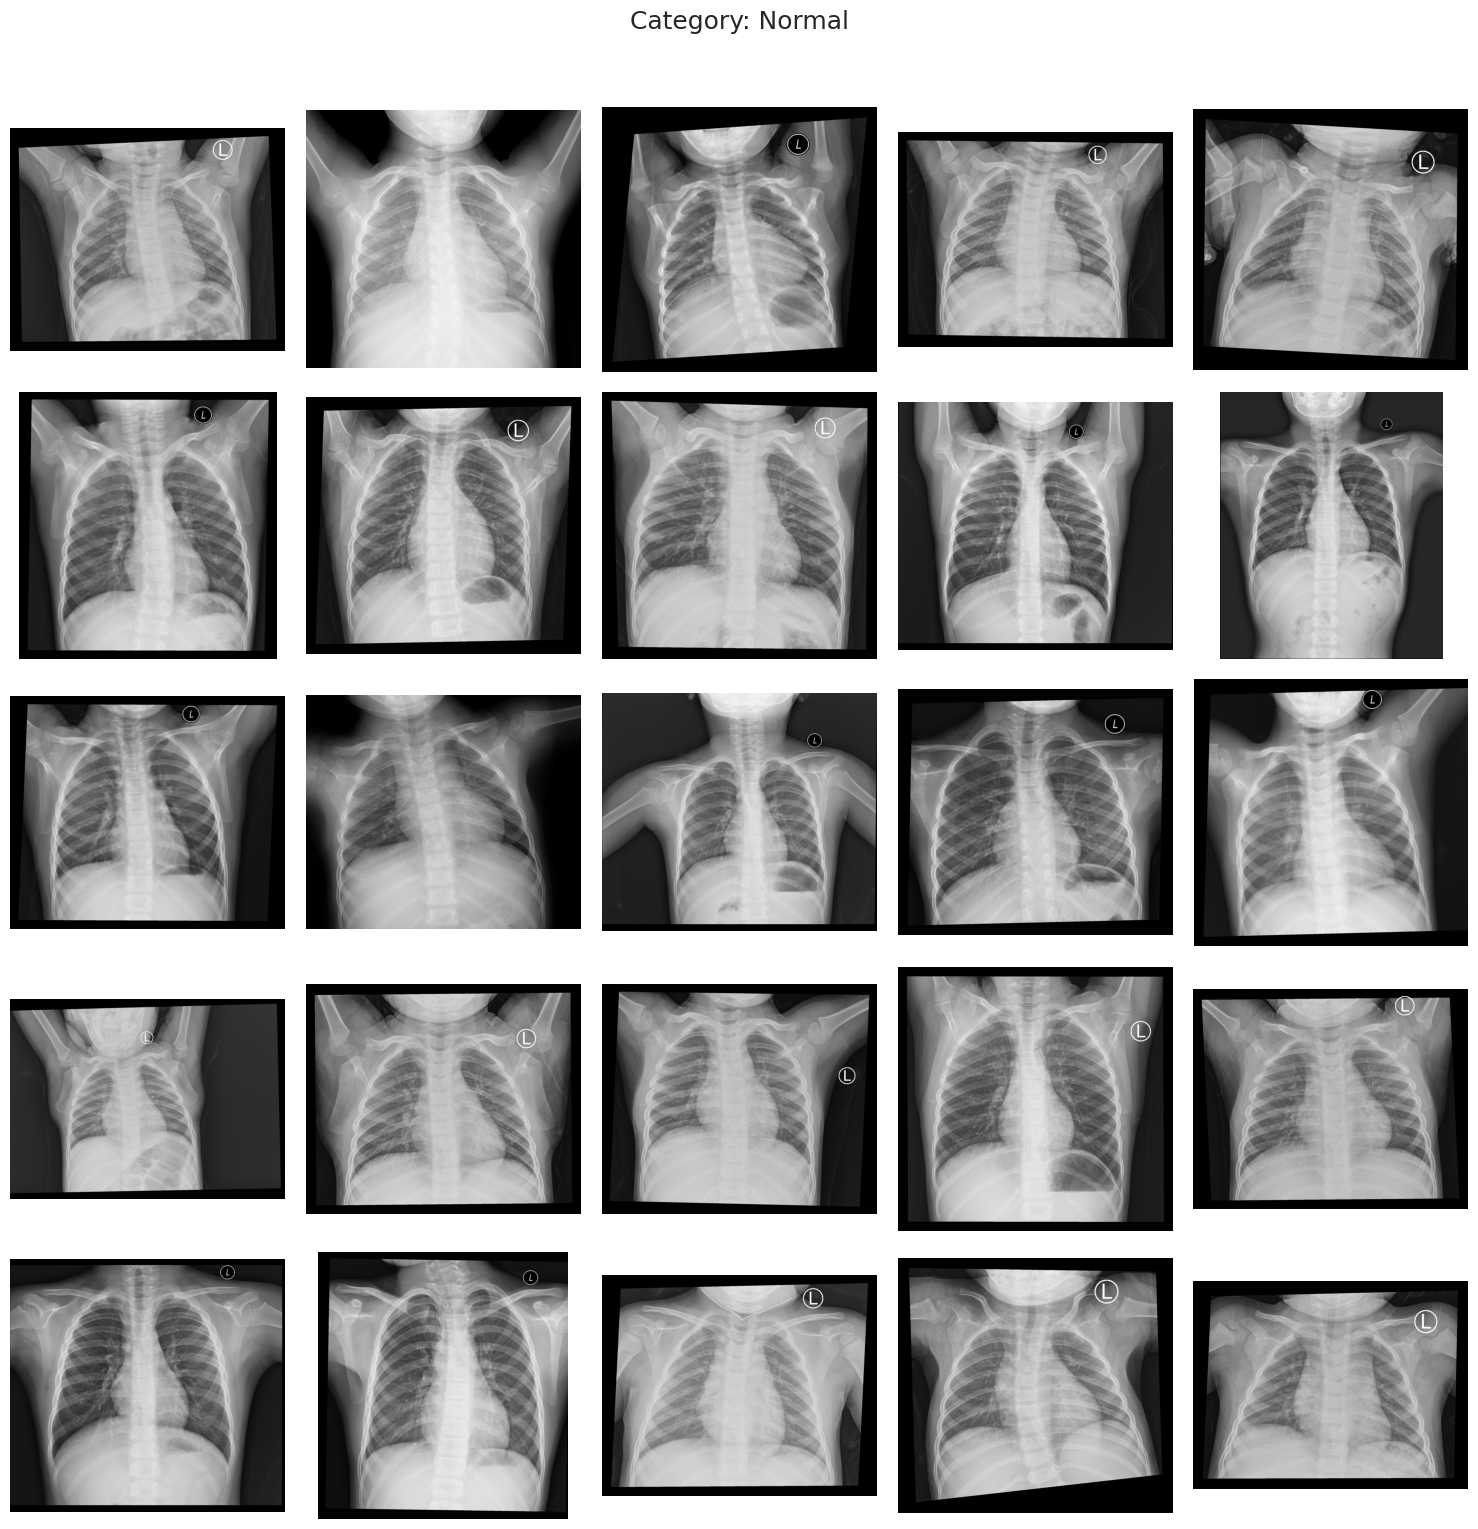

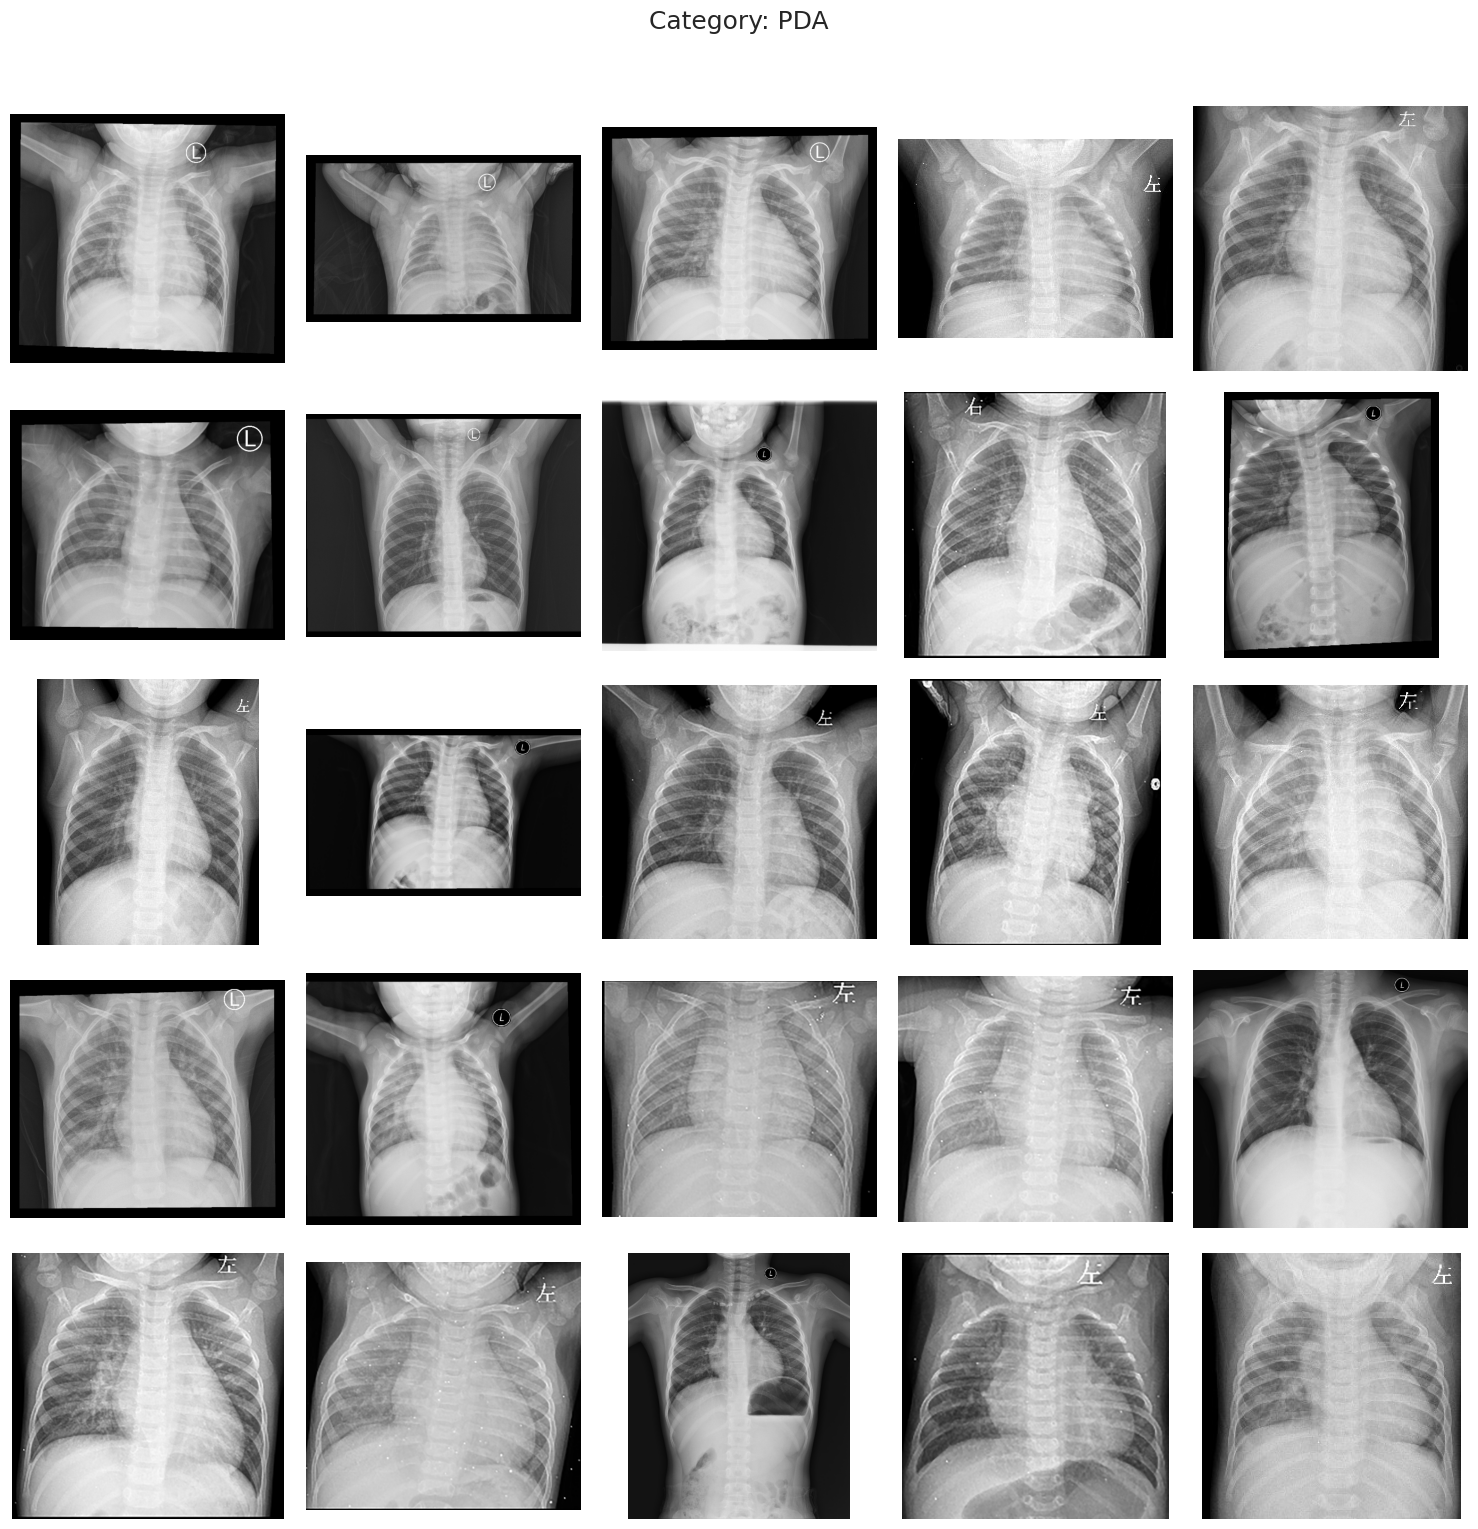

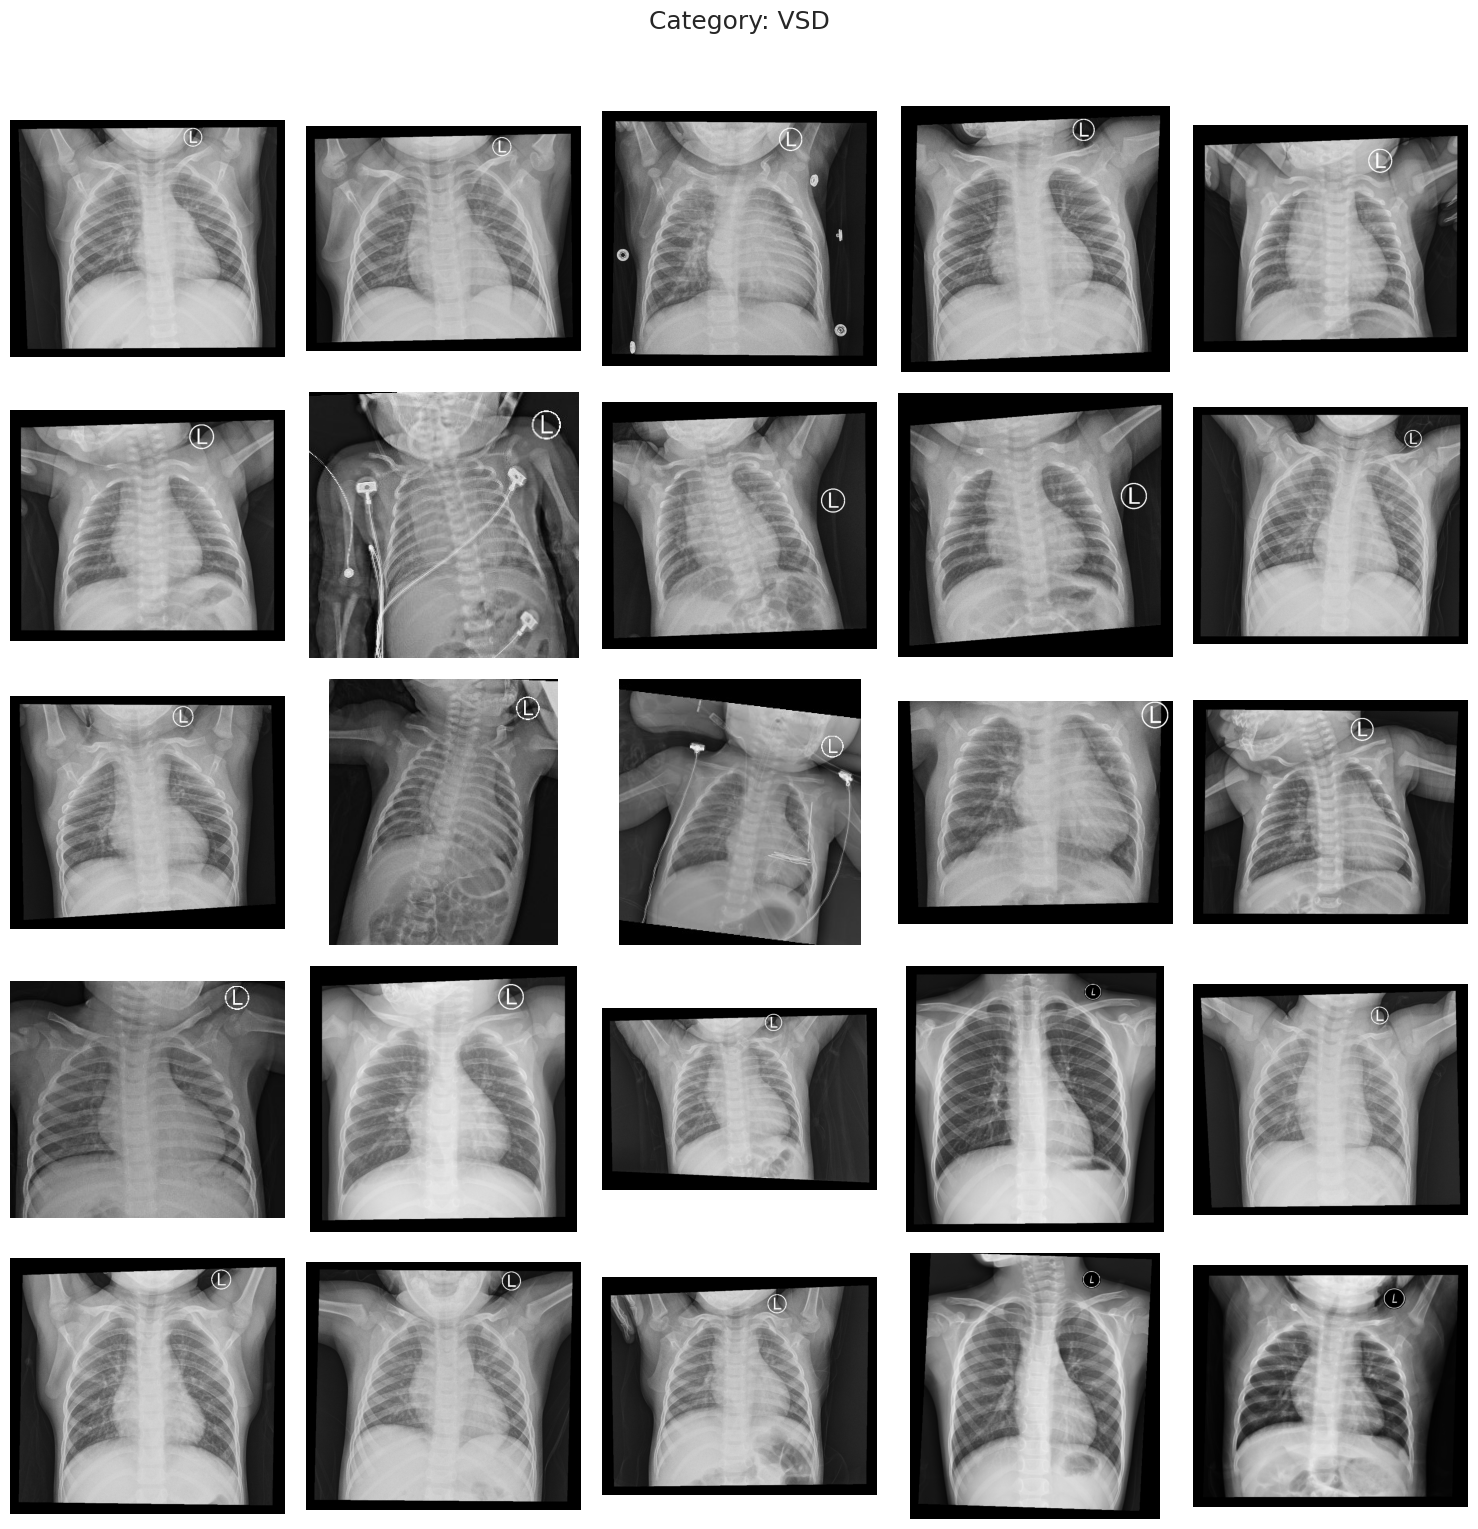

In [ ]:
import cv2

categories = df['label'].unique().tolist()

num_images_per_grid = 25
grid_size = 5

# Create the output directory if it doesn't exist
output_dir = '/kaggle/working/grad_cam_outputs'
os.makedirs(output_dir, exist_ok=True)


for category in categories:
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images_per_grid]

    if len(category_images) == 0:
        print(f"No images found for category: {category}")
        continue

    plt.figure(figsize=(15, 15))
    plt.suptitle(f'Category: {category}', fontsize=18, y=1.02)

    for idx, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image at {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(grid_size, grid_size, idx + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout(pad=1.5)
    plt.show()
    # Save to the created output directory
    plt.savefig(os.path.join(output_dir, f'{category.replace(" ", "_")}_5x5_grid.png'), dpi=400, bbox_inches='tight')
    plt.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [ ]:
df = df[['image_path', 'category_encoded']]

In [ ]:
from sklearn.utils import resample

max_count = df['category_encoded'].value_counts().max()

dfs = []
for category in df['category_encoded'].unique():
    class_subset = df[df['category_encoded'] == category]
    class_upsampled = resample(class_subset,
                               replace=True,
                               n_samples=max_count,
                               random_state=42)
    dfs.append(class_upsampled)

df_balanced = pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_balanced['category_encoded'].value_counts()

category_encoded
0    216
3    216
2    216
1    216
Name: count, dtype: int64

In [ ]:
df_resampled = df_balanced

In [ ]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [ ]:
df_resampled

image_path category_encoded
0    /kaggle/input/congenital-heart-disease-dataset...                0
1    /kaggle/input/congenital-heart-disease-dataset...                3
2    /kaggle/input/congenital-heart-disease-dataset...                2
3    /kaggle/input/congenital-heart-disease-dataset...                1
4    /kaggle/input/congenital-heart-disease-dataset...                0
..                                                 ...              ...
859  /kaggle/input/congenital-heart-disease-dataset...                0
860  /kaggle/input/congenital-heart-disease-dataset...                1
861  /kaggle/input/congenital-heart-disease-dataset...                3
862  /kaggle/input/congenital-heart-disease-dataset...                2
863  /kaggle/input/congenital-heart-disease-dataset...                0

[864 rows x 2 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [ ]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=2,
    width_shift_range=0.01,
    height_shift_range=0.01
)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 691 validated image filenames belonging to 4 classes.
Found 86 validated image filenames belonging to 4 classes.
Found 87 validated image filenames belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:-10]:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=5e-5)

history = model.fit(
    train_gen_new,
    epochs=10,
    validation_data=valid_gen_new,
    callbacks=[early_stopping, reduce_lr]
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 53s 812ms/step - accuracy: 0.3495 - loss: 2.8328 - val_accuracy: 0.2558 - val_loss: 1.3967 - learning_rate: 1.0000e-04
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 444ms/step - accuracy: 0.3452 - loss: 1.3171 - val_accuracy: 0.3488 - val_loss: 1.3688 - learning_rate: 1.0000e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 428ms/step - accuracy: 0.3490 - loss: 1.3002 - val_accuracy: 0.3023 - val_loss: 1.3535 - learning_rate: 1.0000e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 446ms/step - accuracy: 0.3960 - loss: 1.2384 - val_accuracy: 0.4302 - val_loss: 1.3372 - learning_rate: 1.0000e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 449ms/step - accuracy: 0.4101 - loss: 1.2562 - val_accuracy: 0.3023 - val_loss: 1.3669 - learning_rate: 1.0000e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 427ms/step - accuracy: 0.3458 - loss: 1.2833 - val_accuracy: 0.4535 - val_loss: 1.2837 - learning_rate: 1.0000e-04
Epoch 7

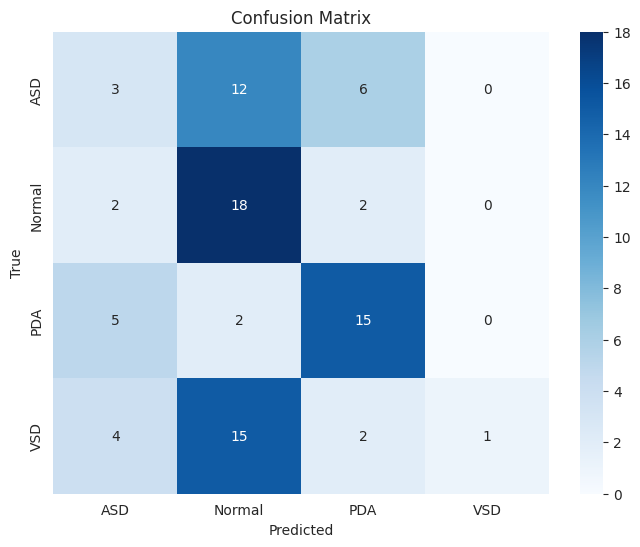


Classification Report:
              precision    recall  f1-score   support

         ASD       0.21      0.14      0.17        21
      Normal       0.38      0.82      0.52        22
         PDA       0.60      0.68      0.64        22
         VSD       1.00      0.05      0.09        22

    accuracy                           0.43        87
   macro avg       0.55      0.42      0.35        87
weighted avg       0.55      0.43      0.36        87



In [ ]:
test_gen_new.reset()
y_true = []
y_pred = []
for images, labels in test_gen_new:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.astype(int))
    y_pred.extend(np.argmax(preds, axis=1))
    if len(y_true) >= test_gen_new.n:
        break
y_true = np.array(y_true)
y_pred = np.array(y_pred)

class_names = ['ASD', 'Normal', 'PDA', 'VSD']

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()
plt.close()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


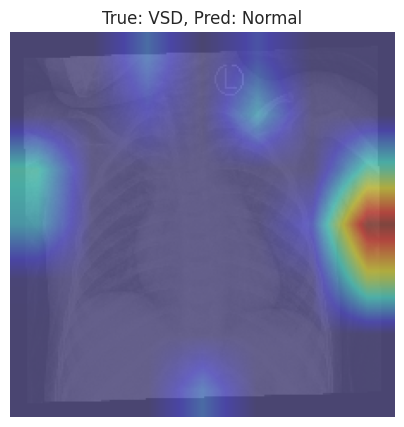

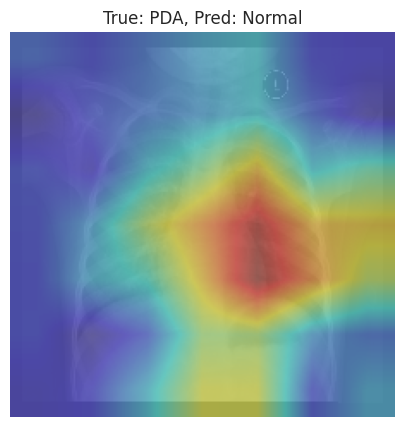

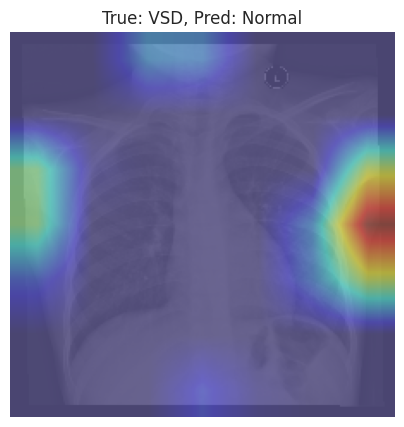

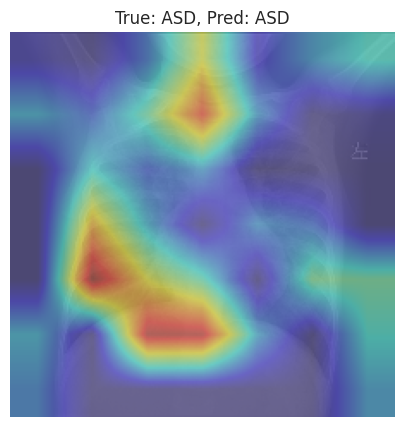

In [ ]:
def grad_cam(model, img_array, layer_name):
    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, tf.argmax(predictions[0])]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

test_images, test_labels = next(test_gen_new)
predictions = model.predict(test_images)
layer_name = 'conv5_block3_out'

os.makedirs('grad_cam_outputs', exist_ok=True)

class_names = {0: 'ASD', 1: 'Normal', 2: 'PDA', 3: 'VSD'}

for i in range(4):
    img = test_images[i]

    img_display = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
    img_display = np.clip(img_display, 0, 1)

    heatmap = grad_cam(model, np.expand_dims(img, axis=0), layer_name)
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    superimposed_img = heatmap.astype(np.float32) * 0.4 + img_display * 255 * 0.6
    superimposed_img = np.clip(superimposed_img / 255, 0, 1)

    plt.figure(figsize=(5, 5))
    plt.imshow(superimposed_img)
    plt.title(f"True: {class_names[int(test_labels[i])]}, Pred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.savefig(f'grad_cam_outputs/image_{i}.png', bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:-10]:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=5e-5)

history = model.fit(
    train_gen_new,
    epochs=10,
    validation_data=valid_gen_new,
    callbacks=[early_stopping, reduce_lr]
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 883ms/step - accuracy: 0.2838 - loss: 3.5059 - val_accuracy: 0.4651 - val_loss: 1.1694 - learning_rate: 1.0000e-04
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 431ms/step - accuracy: 0.4609 - loss: 1.1550 - val_accuracy: 0.4767 - val_loss: 1.1252 - learning_rate: 1.0000e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 431ms/step - accuracy: 0.4376 - loss: 1.1478 - val_accuracy: 0.5116 - val_loss: 1.0693 - learning_rate: 1.0000e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 445ms/step - accuracy: 0.5372 - loss: 1.0740 - val_accuracy: 0.5349 - val_loss: 1.0165 - learning_rate: 1.0000e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 427ms/step - accuracy: 0.5257 - loss: 1.1077 - val_accuracy: 0.5116 - val_loss: 1.0744 - learning_rate: 1.0000e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 450ms/step - accuracy: 0.5481 - loss: 1.0327 - val_accuracy: 0.5930 - val_loss: 0.9767 - learning_rate: 1.0000e-04
Epoch 7

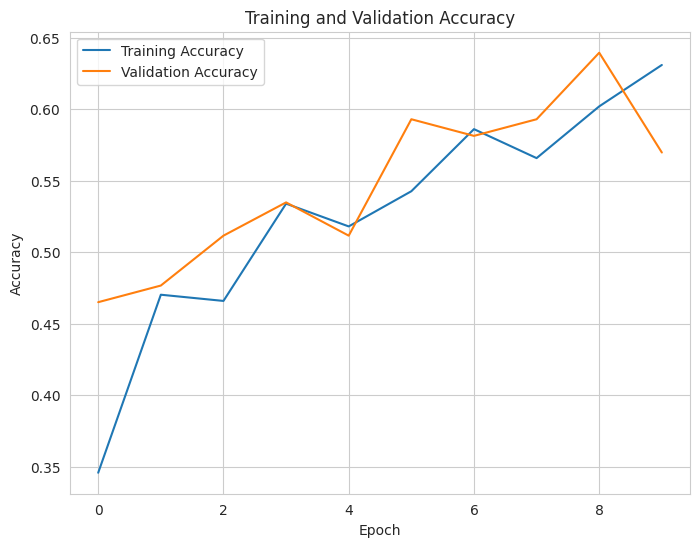

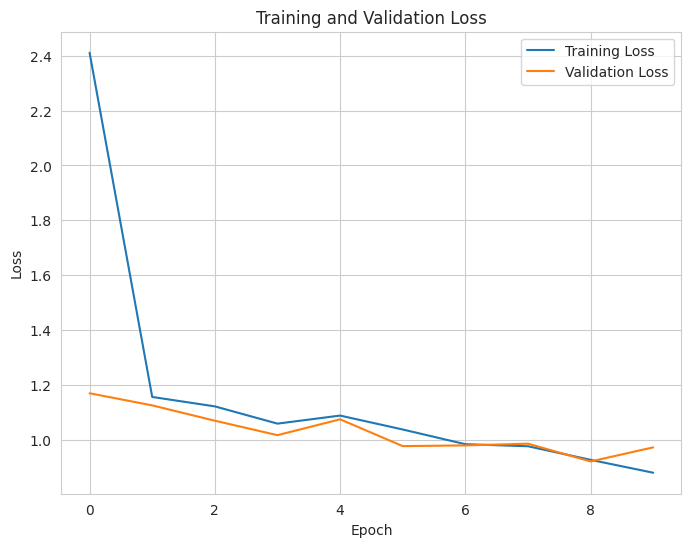

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6586 - loss: 0.9410
Test Accuracy: 63.22%


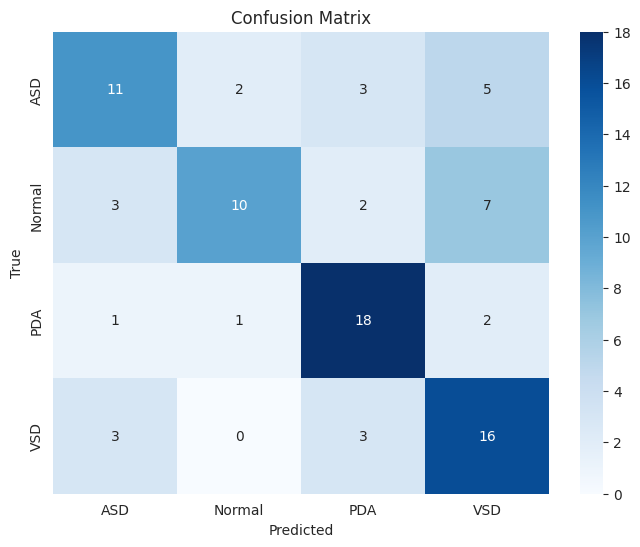


Classification Report:
              precision    recall  f1-score   support

         ASD       0.61      0.52      0.56        21
      Normal       0.77      0.45      0.57        22
         PDA       0.69      0.82      0.75        22
         VSD       0.53      0.73      0.62        22

    accuracy                           0.63        87
   macro avg       0.65      0.63      0.63        87
weighted avg       0.65      0.63      0.63        87



In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('grad_cam_outputs/accuracy_plot.png', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('grad_cam_outputs/loss_plot.png', bbox_inches='tight')
plt.show()
plt.close()

test_results = model.evaluate(test_gen_new)
print(f"Test Accuracy: {test_results[1]*100:.2f}%")

test_gen_new.reset()
y_true = []
y_pred = []
for images, labels in test_gen_new:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.astype(int))
    y_pred.extend(np.argmax(preds, axis=1))
    if len(y_true) >= test_gen_new.n:
        break
y_true = np.array(y_true)
y_pred = np.array(y_pred)

class_names = ['ASD', 'Normal', 'PDA', 'VSD']

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()
plt.close()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


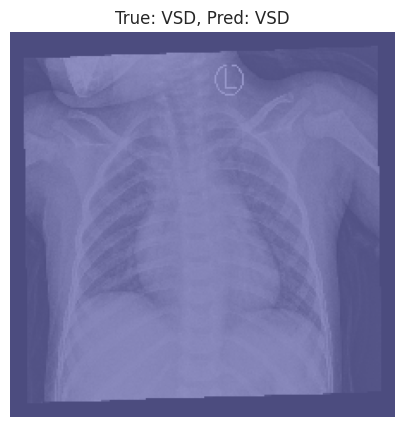

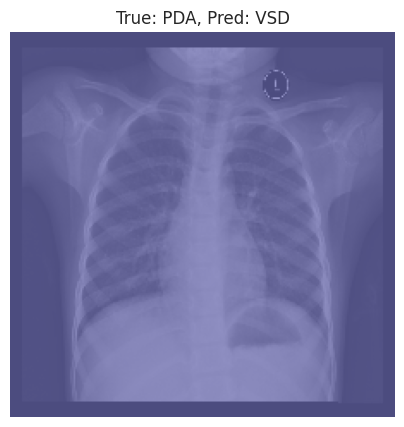

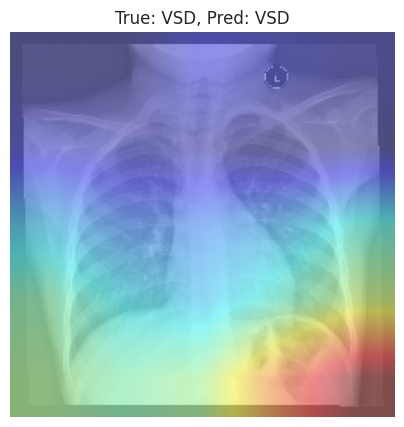

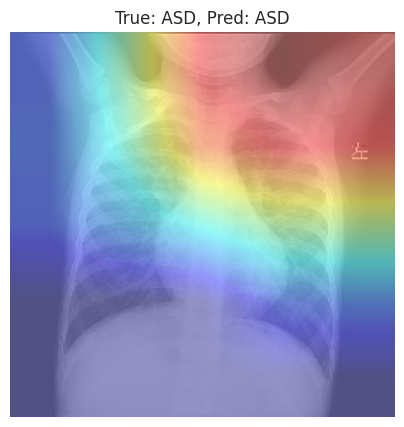

In [ ]:
def grad_cam(model, img_array, layer_name):
    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, tf.argmax(predictions[0])]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

test_gen_new.reset()
test_images, test_labels = next(test_gen_new)
predictions = model.predict(test_images)
layer_name = 'conv2d_93'

for i in range(4):
    img = test_images[i]
    img_display = (img + 1) * 127.5
    img_display = np.clip(img_display / 255, 0, 1)

    heatmap = grad_cam(model, np.expand_dims(img, axis=0), layer_name)
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    superimposed_img = heatmap.astype(np.float32) * 0.4 + img_display * 255 * 0.6
    superimposed_img = np.clip(superimposed_img / 255, 0, 1)

    plt.figure(figsize=(5, 5))
    plt.imshow(superimposed_img)
    plt.title(f"True: {class_names[int(test_labels[i])]}, Pred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.savefig(f'grad_cam_outputs/image_{i}.png', bbox_inches='tight')
    plt.show()
    plt.close()

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 65s 784ms/step - accuracy: 0.2469 - loss: 1.6169 - val_accuracy: 0.2558 - val_loss: 1.4638
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 454ms/step - accuracy: 0.2623 - loss: 1.4226 - val_accuracy: 0.2558 - val_loss: 1.3888
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 466ms/step - accuracy: 0.2682 - loss: 1.3915 - val_accuracy: 0.2442 - val_loss: 1.3890
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 471ms/step - accuracy: 0.2522 - loss: 1.3992 - val_accuracy: 0.2674 - val_loss: 1.3647
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 40s 451ms/step - accuracy: 0.3462 - loss: 1.3773 - val_accuracy: 0.2558 - val_loss: 1.3868


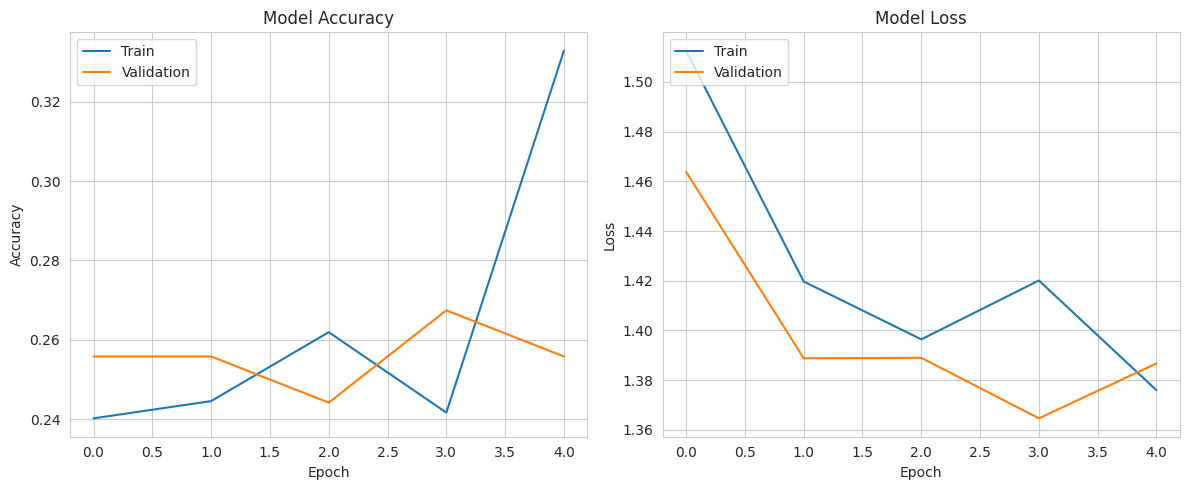


Evaluating on test set:
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 552ms/step - accuracy: 0.2065 - loss: 1.4217
Test Loss: 1.4031
Test Accuracy: 0.2414


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers

class PatchEmbedding(layers.Layer):
    def __init__(self, patch_size, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.proj = layers.Conv2D(embed_dim, patch_size, strides=patch_size, padding='valid')

    def call(self, images):
        patches = self.proj(images)
        patches = tf.reshape(patches, (tf.shape(patches)[0], -1, patches.shape[-1]))  # Flatten patches
        return patches

class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, num_heads, embed_dim):
        super(MultiHeadSelfAttention, self).__init__()
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)

    def call(self, inputs):
        return self.attention(inputs, inputs)

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, mlp_dim, dropout_rate):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadSelfAttention(num_heads, embed_dim)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.mlp = tf.keras.Sequential([
            layers.Dense(mlp_dim, activation='gelu'),
            layers.Dropout(dropout_rate),
            layers.Dense(embed_dim),
            layers.Dropout(dropout_rate)
        ])

    def call(self, inputs):
        x = self.layernorm1(inputs)
        x = self.attention(x)
        x = x + inputs
        x = self.layernorm2(x)
        x = self.mlp(x)
        return x + inputs

class VisionTransformer(tf.keras.Model):
    def __init__(self, image_size, patch_size, embed_dim, num_heads, num_blocks, mlp_dim, num_classes, dropout_rate=0.1): # Added num_classes
        super(VisionTransformer, self).__init__()
        self.patch_embed = PatchEmbedding(patch_size, embed_dim)

        height, width, _ = image_size
        num_patches = (height // patch_size) * (width // patch_size)

        self.pos_embed = self.add_weight(
            name="pos_embed",
            shape=(1, num_patches + 1, embed_dim),
            initializer=tf.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )

        self.cls_token = self.add_weight(
            name="cls_token",
            shape=(1, 1, embed_dim),
            initializer=tf.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )

        self.dropout = layers.Dropout(dropout_rate)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, mlp_dim, dropout_rate) for _ in range(num_blocks)]
        self.layernorm = layers.LayerNormalization(epsilon=1e-6)
        # MODIFICATION: Changed the final dense layer for 4 classes
        self.classifier = layers.Dense(num_classes, activation='softmax') # For multi-class classification

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = self.patch_embed(images)

        cls_tokens = tf.repeat(self.cls_token, repeats=batch_size, axis=0)
        x = tf.concat([cls_tokens, patches], axis=1)

        pos_embed = tf.repeat(self.pos_embed, repeats=batch_size, axis=0)
        x = x + pos_embed
        x = self.dropout(x)

        for block in self.transformer_blocks:
            x = block(x)

        x = self.layernorm(x)
        cls_token_final = x[:, 0]
        return self.classifier(cls_token_final)

image_size = (224, 224, 3)
patch_size = 16
embed_dim = 256
num_heads = 8
num_blocks = 6
mlp_dim = 256
dropout_rate = 0.1
learning_rate = 1e-5
num_classes = 4

vit_model = VisionTransformer(image_size=image_size,
                              patch_size=patch_size,
                              embed_dim=embed_dim,
                              num_heads=num_heads,
                              num_blocks=num_blocks,
                              mlp_dim=mlp_dim,
                              num_classes=num_classes,
                              dropout_rate=dropout_rate)

vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

epochs = 5
history = vit_model.fit(
    train_gen_new,
    epochs=epochs,
    validation_data=valid_gen_new
)

# --- Plotting Training History ---
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.show()

plot_training_history(history)

print("\nEvaluating on test set:")
loss, accuracy = vit_model.evaluate(test_gen_new)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class WindowAttention(layers.Layer):
    def __init__(self, dim, num_heads, window_size):
        super().__init__()
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=False)
        self.proj = layers.Dense(dim)
        self.window_size = window_size

    def call(self, x):
        B, N, C = tf.shape(x)[0], tf.shape(x)[1], tf.shape(x)[2]
        qkv = self.qkv(x)
        qkv = tf.reshape(qkv, (B, N, 3, self.num_heads, C // self.num_heads))
        qkv = tf.transpose(qkv, [2, 0, 3, 1, 4])
        q, k, v = qkv[0], qkv[1], qkv[2]
        attn = tf.matmul(q, k, transpose_b=True) * self.scale
        attn = tf.nn.softmax(attn)
        x = tf.matmul(attn, v)
        x = tf.transpose(x, [0, 2, 1, 3])
        x = tf.reshape(x, (B, N, C))
        return self.proj(x)

class SwinTransformerBlock(layers.Layer):
    def __init__(self, dim, num_heads, window_size):
        super().__init__()
        self.norm1 = layers.LayerNormalization()
        self.attn = WindowAttention(dim, num_heads, window_size)
        self.norm2 = layers.LayerNormalization()
        self.mlp = keras.Sequential([
            layers.Dense(dim * 4, activation='gelu'),
            layers.Dense(dim)
        ])

    def call(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class SwinTransformer(layers.Layer):
    def __init__(self, input_shape, num_classes, patch_size=4, embed_dim=96, num_heads=3, window_size=7): # Added num_classes
        super().__init__()
        self.patch_embed = layers.Conv2D(embed_dim, kernel_size=patch_size, strides=patch_size, padding='same')
        self.swin_block = SwinTransformerBlock(embed_dim, num_heads, window_size)
        self.pool = layers.GlobalAveragePooling1D()
        # MODIFICATION: Changed the final dense layer for multi-class classification
        self.fc = layers.Dense(num_classes, activation='softmax') # For multi-class classification

    def call(self, x):
        x = self.patch_embed(x)
        x = tf.reshape(x, (tf.shape(x)[0], -1, x.shape[-1]))
        x = self.swin_block(x)
        x = self.pool(x)
        return self.fc(x)

# Define the number of classes (e.g., 4 classes for your previous example)
num_classes = 4

input_shape = (224, 224, 3)
swin_model = keras.Sequential([
    layers.Input(shape=input_shape),
    # Pass num_classes to the SwinTransformer layer
    SwinTransformer(input_shape=input_shape, num_classes=num_classes)
])

swin_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ swin_transformer                │ (None, 4)              │       116,644 │
│ (SwinTransformer)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,644 (455.64 KB)

 Trainable params: 116,644 (455.64 KB)

 Non-trainable params: 0 (0.00 B)


Training the Swin Transformer for 5 epochs...
Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 606ms/step - accuracy: 0.2635 - loss: 1.4800 - val_accuracy: 0.2674 - val_loss: 1.3774
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 455ms/step - accuracy: 0.2439 - loss: 1.4118 - val_accuracy: 0.2674 - val_loss: 1.3702
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 499ms/step - accuracy: 0.3245 - loss: 1.3376 - val_accuracy: 0.4186 - val_loss: 1.3027
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 465ms/step - accuracy: 0.3561 - loss: 1.3280 - val_accuracy: 0.3721 - val_loss: 1.3200
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 458ms/step - accuracy: 0.3221 - loss: 1.3459 - val_accuracy: 0.3488 - val_loss: 1.3019

Evaluating on test set:
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 655ms/step - accuracy: 0.3313 - loss: 1.3467
Test Loss: 1.3421
Test Accuracy: 0.3563


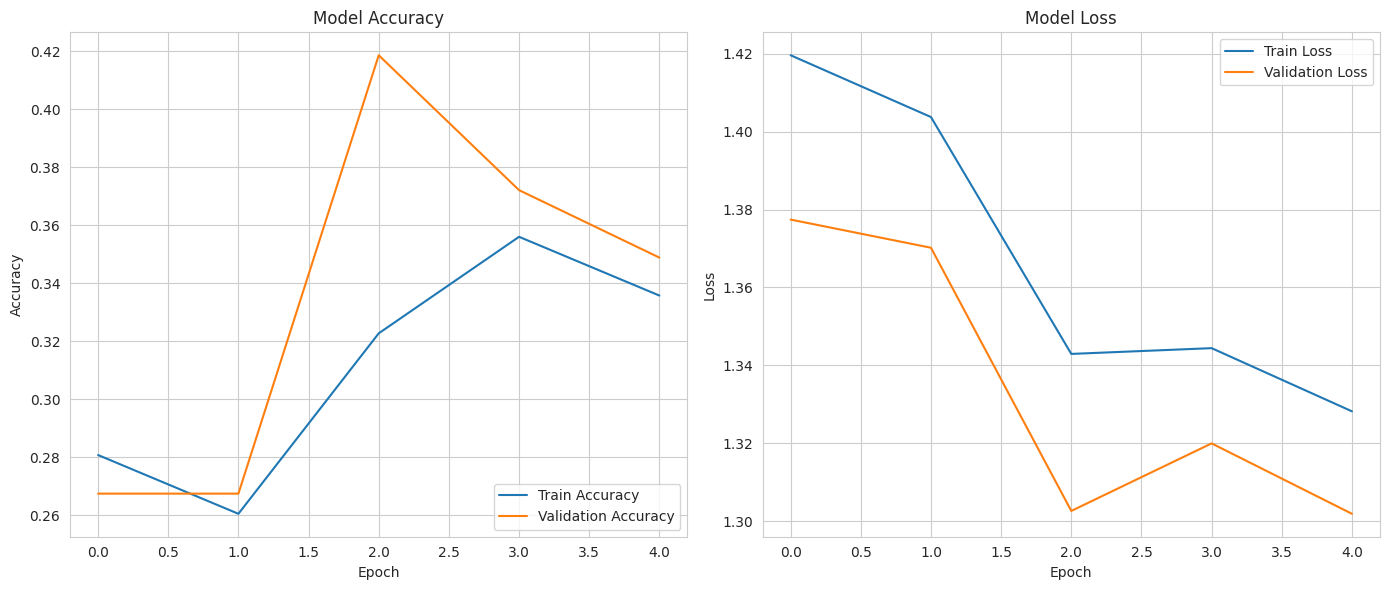

In [ ]:
# --- 3. Compile the Model ---
learning_rate = 1e-4 # Common learning rate for training
swin_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                   loss='sparse_categorical_crossentropy', # Use for integer labels (class_mode='sparse')
                   metrics=['accuracy'])

# --- 4. Train the Model ---
epochs = 5 # Set a small number of epochs for demonstration
print(f"\nTraining the Swin Transformer for {epochs} epochs...")
history = swin_model.fit(
    train_gen_new,
    epochs=epochs,
    validation_data=valid_gen_new
)

# --- 5. Evaluate the Model ---
print("\nEvaluating on test set:")
loss, accuracy = swin_model.evaluate(test_gen_new)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# --- 6. Plotting Training History ---
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the plotting function after training
plot_training_history(history)